In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

# Load data
csv_features = "./acsincome_ca_features.csv"
csv_labels = "./acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.05
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

On ne standardize que les sets de feature, les labels (Y) correspondant à des booléens n'ont pas besoin d'être standardisés.

# Ada Boost

In [10]:
AdaB_model = AdaBoostClassifier()

AdaB_model.fit(X_train, Y_train)
print("Model score on test dataset :  ", AdaB_model.score(X_test, Y_test))
# print("Model score on train dataset : ", AdaB_model.score(X_train, Y_train))

Model score on test dataset :   0.806102110696581


Model score on train dataset : 0.8127

Model score on test dataset with 1% : 0.7321

with 10% : 0.8033

with 20% : 0.8084

with 50% : 0.8061

In [12]:
score = cross_val_score(AdaB_model, X_train, Y_train, cv=5).mean()
print(score)

0.8043702642821294


Score moyen obtenu par cross validation du modèle avec les paramètres défauts : 0.8044

## 1.

## 1. Recherche de paramètres : 

Paramètres défaut : param_def ={
    
    n_estimators : 100,

    max_depth : None,

    min_samples_split : 2,
    
    min_samples_leaf : 1
} 

### n_estimators

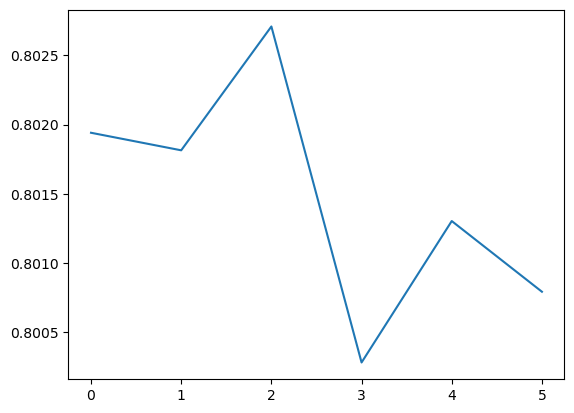

In [ ]:
val_score = []
tab = [50, 100, 200, 300, 400, 500]
for n in tab:
    score = cross_val_score(RandomForestClassifier(n_estimators=n), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

optimal autour de 200

### criterion

Score pour le paramètre criterion gini :  0.8024535761937986
Score pour le paramètre criterion entropy :  0.8007921527344244
Score pour le paramètre criterion log_loss :  0.8029646766960857


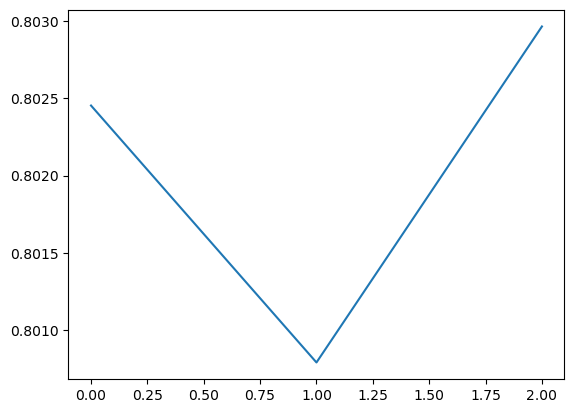

In [ ]:
val_score = []
for c in ['gini', 'entropy', 'log_loss']:
    score = cross_val_score(RandomForestClassifier(criterion=c), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre criterion", c, ": ",score)
    val_score.append(score)

plt.plot(val_score)

une fois sur deux meilleur gini, une fois log loss => peu d'écart

### max_depth

Score pour le paramètre max_depth None :  0.7988757094651113
Score pour le paramètre max_depth 3 :  0.7800919703442564
Score pour le paramètre max_depth 8 :  0.8074363776578165
Score pour le paramètre max_depth 10 :  0.8087146593547386
Score pour le paramètre max_depth 12 :  0.8034751243476592
Score pour le paramètre max_depth 50 :  0.8021975771077898
Score pour le paramètre max_depth 100 :  0.7987481587569722


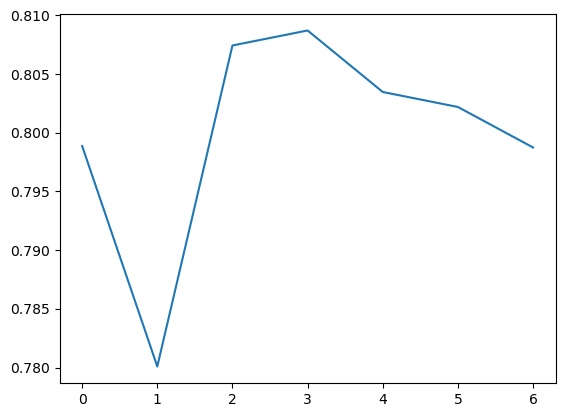

In [ ]:
val_score = []
for m in [None, 3, 8, 10, 12, 50, 100]:
    score = cross_val_score(RandomForestClassifier(max_depth=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre max_depth", m, ": ",score)
    val_score.append(score)

plt.plot(val_score)

Intéressant autour de 10.

### min_samples_split

Score pour le paramètre min_samples_split 2 :  0.8002809706257981
Score pour le paramètre min_samples_split 10 :  0.8064147478976167
Score pour le paramètre min_samples_split 20 :  0.8059038106080081
Score pour le paramètre min_samples_split 28 :  0.8082034772461124
Score pour le paramètre min_samples_split 30 :  0.8071812762415383
Score pour le paramètre min_samples_split 32 :  0.8083311911669299
Score pour le paramètre min_samples_split 50 :  0.8078198458456253
Score pour le paramètre min_samples_split 100 :  0.8042418975105987
Score pour le paramètre min_samples_split 200 :  0.799897339225311
Score pour le paramètre min_samples_split 500 :  0.7954249038065277


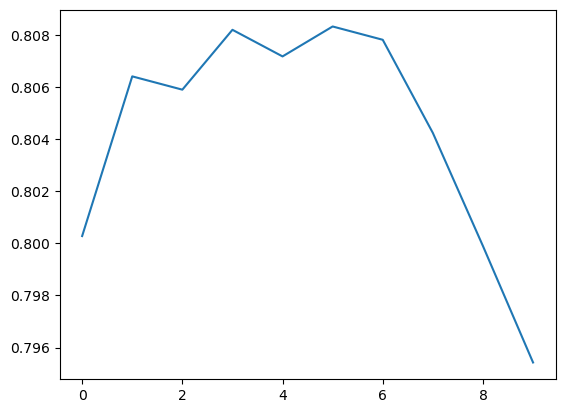

In [ ]:
val_score = []
tab = [2, 10, 20, 28, 30, 32, 50, 100, 200, 500]
for m in tab :
    score = cross_val_score(RandomForestClassifier(min_samples_split=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre min_samples_split", m, ": ",score)
    val_score.append(score)

# plt.scatter(val_score, tab)
plt.plot(val_score)

Max autour de 30

### min_samples_leaf

Score pour le paramètre min_samples_leaf 1 :  0.8016871294562161
Score pour le paramètre min_samples_leaf 2 :  0.8014313751892246
Score pour le paramètre min_samples_leaf 3 :  0.8057761782935298
Score pour le paramètre min_samples_leaf 4 :  0.8085862925832078
Score pour le paramètre min_samples_leaf 5 :  0.8059031577572945
Score pour le paramètre min_samples_leaf 6 :  0.8089696791646777
Score pour le paramètre min_samples_leaf 7 :  0.808202824395399
Score pour le paramètre min_samples_leaf 10 :  0.8087141697167036
Score pour le paramètre min_samples_leaf 20 :  0.806925113942851
Score pour le paramètre min_samples_leaf 30 :  0.8036025934494593


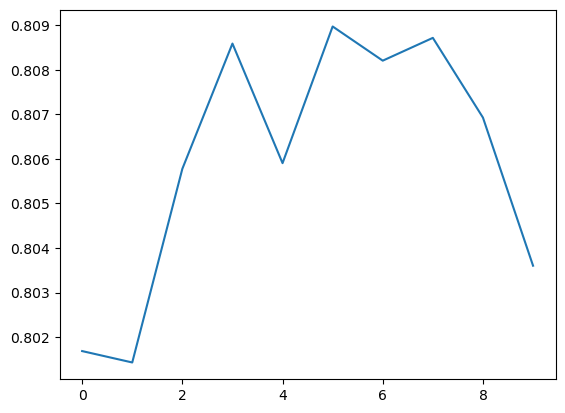

In [ ]:
val_score = []
tab = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30]
for m in tab :
    score = cross_val_score(RandomForestClassifier(min_samples_leaf=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre min_samples_leaf", m, ": ",score)
    val_score.append(score)

# plt.scatter(val_score, tab)
plt.plot(val_score)

Max : 4, 6

### max_features

Score pour le paramètre max_features sqrt :  0.8009206011122945
Score pour le paramètre max_features log2 :  0.800153827949355
Score pour le paramètre max_features None :  0.795808616813354
Score pour le paramètre max_features 1 :  0.7990039946303028
Score pour le paramètre max_features 10 :  0.798747995544294
Score pour le paramètre max_features 20 :  0.7940198058585192
Score pour le paramètre max_features 30 :  0.7935087869625711


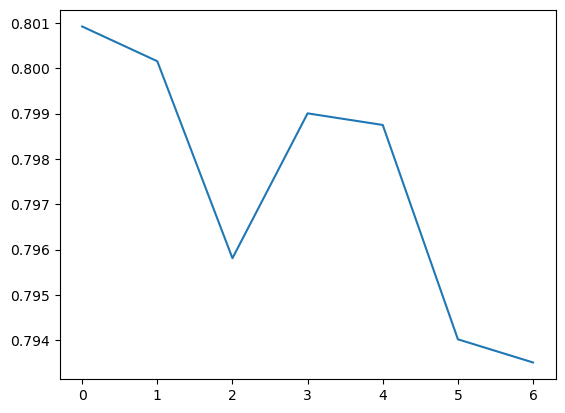

In [ ]:
val_score = []
tab = ['sqrt', 'log2', None, 1, 10, 20, 30]
for m in tab :
    score = cross_val_score(RandomForestClassifier(max_features=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre max_features", m, ": ",score)
    val_score.append(score)

# plt.scatter(val_score, tab)
plt.plot(val_score)

sqrt meilleur

## 2.

## 2. Evaluation de la qualité du modèle avec les paramètres choisis

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200, criterion='log_loss', max_depth=10, min_samples_split=30,
                                  min_samples_leaf=6, max_features='sqrt')
RF_model.fit(X_train, Y_train)
print("modele entrainé")

modele entrainé


### Accuracy

In [ ]:
predictions = RF_model.predict(X_test)

res = pd.Series(predictions)
res.value_counts()

False    1178
True      779
Name: count, dtype: int64

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.8022


### Classification report

In [ ]:
report = classification_report(Y_test, predictions)
print('Classification Report y_test et predictions en svm:\n', report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.83      0.84      0.83      1165
        True       0.76      0.75      0.75       792

    accuracy                           0.80      1957
   macro avg       0.80      0.79      0.79      1957
weighted avg       0.80      0.80      0.80      1957



### Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix Y_test et predictions en svm :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[978 187]
 [200 592]]


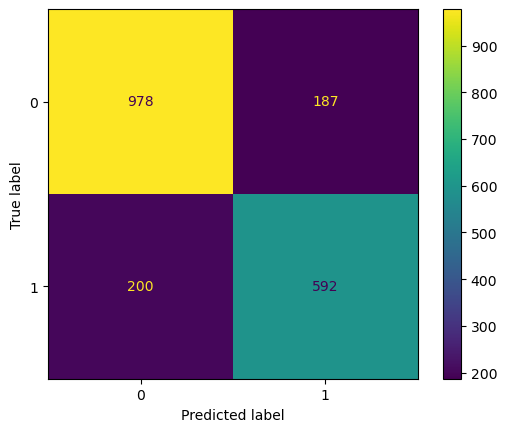

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

<Axes: >

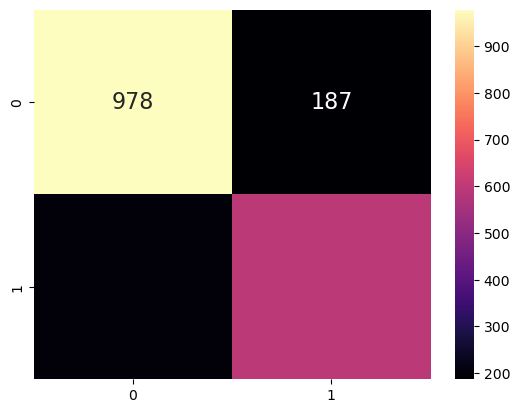

In [ ]:
# sns.set_theme(font_scale=1.4)  # ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g', cmap='magma')


## 3.

## 3. Gridsearch

4 min pour 1% du dataset

In [ ]:
param_grid ={
    'n_estimators' :[100, 150, 200, 250],
    'criterion' : ['gini', 'log_loss'],
    'max_depth' : [8, 10, 12],
    'min_samples_split' :[28, 30, 32],
    'min_samples_leaf' :[4, 5, 6]   
} 
grid= GridSearchCV(estimator= RandomForestClassifier(random_state=0),
                   param_grid=param_grid, scoring='accuracy', cv=5)

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [8, 10, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [28, 30, 32],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

In [ ]:
print("best score : ",grid.best_score_)

print("best parameters : ", grid.best_params_)

best score :  0.8024002621446711
best parameters :  {'criterion': 'log_loss', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 32, 'n_estimators': 100}


In [ ]:
Best_RF = grid.best_estimator_

In [ ]:
Best_RF.score(X_test, Y_test)

0.7729591836734694

## 4.

## 4. Evaluation de la qualité du modèle avec les meilleurs hyperparamètres

### Accuracy

In [ ]:
Best_predictions = Best_RF.predict(X_test)

Best_res = pd.Series(Best_predictions)
Best_res.value_counts()

False    252
True     140
Name: count, dtype: int64

In [ ]:
Best_accuracy = accuracy_score(Y_test, Best_predictions)
print(f'Accuracy : {Best_accuracy:.4f}')

Accuracy : 0.7730


### Classification report

In [ ]:
Best_report = classification_report(Y_test, Best_predictions)
print('Classification Report y_test et predictions en svm:\n', Best_report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.75      0.88      0.81       217
        True       0.81      0.65      0.72       175

    accuracy                           0.77       392
   macro avg       0.78      0.76      0.76       392
weighted avg       0.78      0.77      0.77       392



### Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(Y_test, Best_predictions)
print('Confusion Matrix Y_test et predictions en svm :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[190  27]
 [ 62 113]]


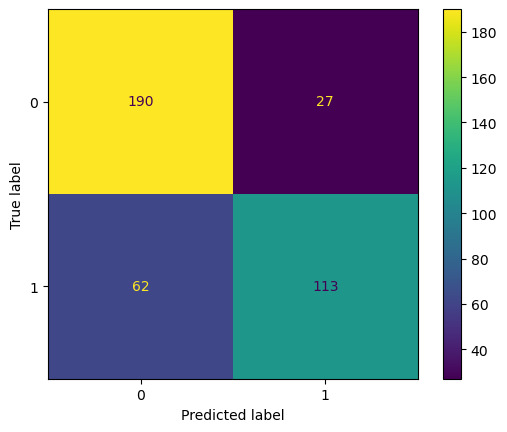

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

<Axes: >

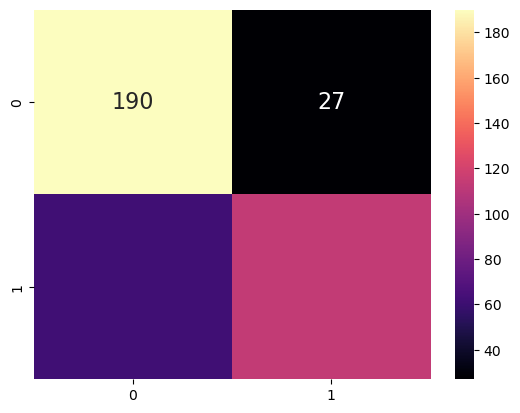

In [ ]:
# sns.set_theme(font_scale=1.4)  # ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g', cmap='magma')
